TP SON

In [5]:
import musdb
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

In [4]:
!pip install musdb
import musdb

# Cela télécharge automatiquement les données (30+ GB, très long !)
mus = musdb.DB(download=True, root='/kaggle/working/musdb18')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.2/963.2 kB 14.0 MB/s eta 0:00:00 0:00:01


100%|██████████| 140M/140M [00:00<00:00, 246MB/s]  


100%|██████████| 140M/140M [00:00<00:00, 163MB/s]  


Playing vocals (first 5 seconds)...


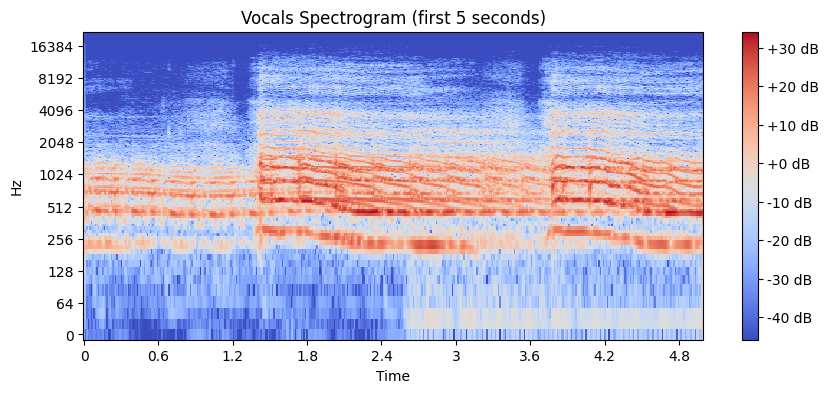

In [6]:
import musdb
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

# Load track
mus = musdb.DB(download=True)
track = mus.tracks[0]

# Get 5 seconds of vocals
vocals = track.targets['vocals'].audio[:5*44100]

# 1. Listen
print("Playing vocals (first 5 seconds)...")
display(Audio(vocals.T, rate=44100, autoplay=False))

# 2. Display spectrogram
vocals_mono = np.mean(vocals, axis=1)
S = librosa.stft(vocals_mono, n_fft=2048, hop_length=512)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=44100, hop_length=512, 
                         x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Vocals Spectrogram (first 5 seconds)')
plt.show()
# Each stem:
# stem 0: mixture
# stem 1: drums
# stem 2: bass
# stem 3: other
# stem 4: vocals

In [12]:
import os

# Check one .stem.mp4 file
import stempeg

# Read a .stem.mp4 file
audio, rate = stempeg.read_stems(
    '/kaggle/working/musdb18/train/Dreamers Of The Ghetto - Heavy Love.stem.mp4'
)

print(f"Audio shape: {audio.shape}")  # (stems, samples, channels)
print(f"Stems: {audio.shape[0]}")     # Usually 5 stems
print(f"Sample rate: {rate}")



Audio shape: (5, 300032, 2)
Stems: 5
Sample rate: 44100


In [13]:
import os, glob

# Look for spectrogram files
spectrogram_files = glob.glob('/kaggle/working/musdb18/**/*.npy', recursive=True)
spectrogram_files += glob.glob('/kaggle/working/musdb18/**/*.h5', recursive=True)

print(f"Found {len(spectrogram_files)} spectrogram files")
if spectrogram_files:
    print("First few:", spectrogram_files[:3])
else:
    print("NO pre-computed spectrograms found!")
    print("You only have .stem.mp4 audio files")

Found 0 spectrogram files
NO pre-computed spectrograms found!
You only have .stem.mp4 audio files


In [ ]:
# import torch
# import torch.nn as nn

# class UNet(nn.Module):
#     def __init__(self, input_channels=1, output_channels=1):
#         super(UNet, self).__init__()
        
#         # ENCODER - Downsampling Path
#         self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=5, stride=2, padding=2)
#         self.bn1 = nn.BatchNorm2d(16)
#         self.lrelu1 = nn.LeakyReLU(0.2, inplace=True)
        
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2)
#         self.bn2 = nn.BatchNorm2d(32)
#         self.lrelu2 = nn.LeakyReLU(0.2, inplace=True)
        
#         self.conv3 = nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2)
#         self.bn3 = nn.BatchNorm2d(64)
#         self.lrelu3 = nn.LeakyReLU(0.2, inplace=True)
        
#         self.conv4 = nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2)
#         self.bn4 = nn.BatchNorm2d(128)
#         self.lrelu4 = nn.LeakyReLU(0.2, inplace=True)
        
#         self.conv5 = nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2)
#         self.bn5 = nn.BatchNorm2d(256)from config import *
# from tensorflow.keras import Input, Model
# from tensorflow.keras.layers import Conv2D, Dropout, BatchNormalization, LeakyReLU, Conv2DTranspose as Deconv2D, Activation, Concatenate


# def unet(inputs=Input((512, 128, 1))):
#     conv1 = Conv2D(16, 5, strides=2, padding='same')(inputs)
#     conv1 = BatchNormalization()(conv1)
#     conv1 = LeakyReLU(alpha=0.2)(conv1)

#     conv2 = Conv2D(32, 5, strides=2, padding='same')(conv1)
#     conv2 = BatchNormalization()(conv2)
#     conv2 = LeakyReLU(alpha=0.2)(conv2)

#     conv3 = Conv2D(64, 5, strides=2, padding='same')(conv2)
#     conv3 = BatchNormalization()(conv3)
#     conv3 = LeakyReLU(alpha=0.2)(conv3)

#     conv4 = Conv2D(128, 5, strides=2, padding='same')(conv3)
#     conv4 = BatchNormalization()(conv4)
#     conv4 = LeakyReLU(alpha=0.2)(conv4)

#     conv5 = Conv2D(256, 5, strides=2, padding='same')(conv4)
#     conv5 = BatchNormalization()(conv5)
#     conv5 = LeakyReLU(alpha=0.2)(conv5)

#     conv6 = Conv2D(512, 5, strides=2, padding='same')(conv5)
#     conv6 = BatchNormalization()(conv6)
#     conv6 = LeakyReLU(alpha=0.2)(conv6)

#     deconv7 = Deconv2D(256, 5, strides=2, padding='same')(conv6)
#     deconv7 = BatchNormalization()(deconv7)
#     deconv7 = Dropout(0.5)(deconv7)
#     deconv7 = Activation('relu')(deconv7)

#     deconv8 = Concatenate(axis=3)([deconv7, conv5])
#     deconv8 = Deconv2D(128, 5, strides=2, padding='same')(deconv8)
#     deconv8 = BatchNormalization()(deconv8)
#     deconv8 = Dropout(0.5)(deconv8)
#     deconv8 = Activation('relu')(deconv8)

#     deconv9 = Concatenate(axis=3)([deconv8, conv4])
#     deconv9 = Deconv2D(64, 5, strides=2, padding='same')(deconv9)
#     deconv9 = BatchNormalization()(deconv9)
#     deconv9 = Dropout(0.5)(deconv9)
#     deconv9 = Activation('relu')(deconv9)

#     deconv10 = Concatenate(axis=3)([deconv9, conv3])
#     deconv10 = Deconv2D(32, 5, strides=2, padding='same')(deconv10)
#     deconv10 = BatchNormalization()(deconv10)
#     deconv10 = Activation('relu')(deconv10)

#     deconv11 = Concatenate(axis=3)([deconv10, conv2])
#     deconv11 = Deconv2D(16, 5, strides=2, padding='same')(deconv11)
#     deconv11 = BatchNormalization()(deconv11)
#     deconv11 = Activation('relu')(deconv11)

#     deconv12 = Concatenate(axis=3)([deconv11, conv1])
#     deconv12 = Deconv2D(1, 5, strides=2, padding='same')(deconv12)
#     deconv12 = Activation('relu')(deconv12)

#     model = Model(inputs=inputs, outputs=deconv12)
#     model.summary()
#     return model
#         self.lrelu5 = nn.LeakyReLU(0.2, inplace=True)
        
#         # Bottleneck
#         self.conv6 = nn.Conv2d(256, 512, kernel_size=5, stride=2, padding=2)
#         self.bn6 = nn.BatchNorm2d(512)
#         self.lrelu6 = nn.LeakyReLU(0.2, inplace=True)
        
#         # DECODER - Upsampling Path
#         # First 3 layers use 50% dropout
#         self.deconv7 = nn.ConvTranspose2d(512, 256, kernel_size=5, stride=2, padding=2, output_padding=1)
#         self.bn7 = nn.BatchNorm2d(256)
#         self.dropout7 = nn.Dropout2d(0.5)
#         self.relu7 = nn.ReLU(inplace=True)
        
#         self.deconv8 = nn.ConvTranspose2d(512, 128, kernel_size=5, stride=2, padding=2, output_padding=1)
#         self.bn8 = nn.BatchNorm2d(128)
#         self.dropout8 = nn.Dropout2d(0.5)
#         self.relu8 = nn.ReLU(inplace=True)
        
#         self.deconv9 = nn.ConvTranspose2d(256, 64, kernel_size=5, stride=2, padding=2, output_padding=1)
#         self.bn9 = nn.BatchNorm2d(64)
#         self.dropout9 = nn.Dropout2d(0.5)
#         self.relu9 = nn.ReLU(inplace=True)
        
#         self.deconv10 = nn.ConvTranspose2d(128, 32, kernel_size=5, stride=2, padding=2, output_padding=1)
#         self.bn10 = nn.BatchNorm2d(32)
#         self.relu10 = nn.ReLU(inplace=True)
        
#         self.deconv11 = nn.ConvTranspose2d(64, 16, kernel_size=5, stride=2, padding=2, output_padding=1)
#         self.bn11 = nn.BatchNorm2d(16)
#         self.relu11 = nn.ReLU(inplace=True)
        
#         # Output layer - NOTE: Uses ReLU (not Sigmoid) as in original TensorFlow code
#         self.deconv12 = nn.ConvTranspose2d(32, output_channels, kernel_size=5, stride=2, padding=2, output_padding=1)
#         self.relu12 = nn.ReLU(inplace=True)
        
#     def forward(self, x):
#         # Encoder path - save outputs for skip connections
#         conv1 = self.lrelu1(self.bn1(self.conv1(x)))
#         conv2 = self.lrelu2(self.bn2(self.conv2(conv1)))
#         conv3 = self.lrelu3(self.bn3(self.conv3(conv2)))
#         conv4 = self.lrelu4(self.bn4(self.conv4(conv3)))
#         conv5 = self.lrelu5(self.bn5(self.conv5(conv4)))
#         conv6 = self.lrelu6(self.bn6(self.conv6(conv5)))
        
#         # Decoder path - with skip connections
#         # NOTE: Concatenation is on dim=1 (channel dimension in PyTorch)
#         deconv7 = self.relu7(self.dropout7(self.bn7(self.deconv7(conv6))))
#         deconv7 = torch.cat([deconv7, conv5], dim=1)
        
#         deconv8 = self.relu8(self.dropout8(self.bn8(self.deconv8(deconv7))))
#         deconv8 = torch.cat([deconv8, conv4], dim=1)
        
#         deconv9 = self.relu9(self.dropout9(self.bn9(self.deconv9(deconv8))))
#         deconv9 = torch.cat([deconv9, conv3], dim=1)
        
#         deconv10 = self.relu10(self.bn10(self.deconv10(deconv9)))
#         deconv10 = torch.cat([deconv10, conv2], dim=1)
        
#         deconv11 = self.relu11(self.bn11(self.deconv11(deconv10)))
#         deconv11 = torch.cat([deconv11, conv1], dim=1)
        
#         output = self.relu12(self.deconv12(deconv11))
        
#         return output


# if __name__ == "__main__":
#     # Create model
#     model = UNet(input_channels=1, output_channels=1)
    
#     # Test forward pass
#     batch_size = 4
#     x = torch.randn(batch_size, 1, 512, 128)
    
#     print(f"Input shape:  {x.shape}")
    
#     # Training mode (with dropout)
#     model.train()
#     output_train = model(x)
#     print(f"Output shape (train): {output_train.shape}")
    
#     # Evaluation mode (without dropout)
#     model.eval()
#     with torch.no_grad():
#         output_eval = model(x)
#     print(f"Output shape (eval):  {output_eval.shape}")
    
#     # Count parameters
#     total_params = sum(p.numel() for p in model.parameters())
#     print(f"\nTotal parameters: {total_params:,}")
    
#     print("\n" + "="*60)
#     print("IMPORTANT DIFFERENCES FROM PREVIOUS IMPLEMENTATION:")
#     print("="*60)
#     print("❌ Previous: Final activation was SIGMOID")
#     print("✓ Current:  Final activation is RELU (matches TensorFlow code)")
#     print("\nThis follows the exact TensorFlow implementation provided.")
#     print("="*60)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
from typing import Optional, Dict, Literal
import numpy as np
import matplotlib.pyplot as plt


class UNet(nn.Module):
    def __init__(self, 
                 target_type: Literal['vocal', 'instrumental'] = 'vocal',
                 device: Optional[str] = None, 
                 lr: float = 1e-3, 
                 threshold: float = 0.5):
        super().__init__()
        
        if device is None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = torch.device(device)
        
        self.target_type = target_type
        self.threshold = threshold
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True)
        )
        
        self.deconv1 = nn.ConvTranspose2d(512, 256, kernel_size=5, stride=2, padding=2)
        self.deconv1_norm = nn.Sequential(
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(0.5)
        )
        
        self.deconv2 = nn.ConvTranspose2d(512, 128, kernel_size=5, stride=2, padding=2)
        self.deconv2_norm = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout2d(0.5)
        )
        
        self.deconv3 = nn.ConvTranspose2d(256, 64, kernel_size=5, stride=2, padding=2)
        self.deconv3_norm = nn.Sequential(
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Dropout2d(0.5)
        )
        
        self.deconv4 = nn.ConvTranspose2d(128, 32, kernel_size=5, stride=2, padding=2)
        self.deconv4_norm = nn.Sequential(
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )
        
        self.deconv5 = nn.ConvTranspose2d(64, 16, kernel_size=5, stride=2, padding=2)
        self.deconv5_norm = nn.Sequential(
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        )
        
        self.deconv6 = nn.ConvTranspose2d(32, 1, kernel_size=5, stride=2, padding=2)
        
        self.sigmoid = nn.Sigmoid()
        
        self.criterion = nn.L1Loss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        
        self.train_losses = []
        self.val_losses = []
        
        self.to(self.device)
    
    def forward(self, X):
        conv1_out = self.conv1(X)
        conv2_out = self.conv2(conv1_out)
        conv3_out = self.conv3(conv2_out)
        conv4_out = self.conv4(conv3_out)
        conv5_out = self.conv5(conv4_out)
        conv6_out = self.conv6(conv5_out)
        
        deconv1_out = self.deconv1(conv6_out, output_size=conv5_out.size())
        deconv1_out = self.deconv1_norm(deconv1_out)
        
        deconv2_in = torch.cat([deconv1_out, conv5_out], dim=1)
        deconv2_out = self.deconv2(deconv2_in, output_size=conv4_out.size())
        deconv2_out = self.deconv2_norm(deconv2_out)
        
        deconv3_in = torch.cat([deconv2_out, conv4_out], dim=1)
        deconv3_out = self.deconv3(deconv3_in, output_size=conv3_out.size())
        deconv3_out = self.deconv3_norm(deconv3_out)
        
        deconv4_in = torch.cat([deconv3_out, conv3_out], dim=1)
        deconv4_out = self.deconv4(deconv4_in, output_size=conv2_out.size())
        deconv4_out = self.deconv4_norm(deconv4_out)
        
        deconv5_in = torch.cat([deconv4_out, conv2_out], dim=1)
        deconv5_out = self.deconv5(deconv5_in, output_size=conv1_out.size())
        deconv5_out = self.deconv5_norm(deconv5_out)
        
        deconv6_in = torch.cat([deconv5_out, conv1_out], dim=1)
        deconv6_out = self.deconv6(deconv6_in, output_size=X.size())
        
        mask = self.sigmoid(deconv6_out)
        
        return mask
    
    def compute_metrics(self, mask, X, Y):
        predicted = mask * X
        
        pred_binary = (mask > self.threshold).float()
        target_mask = (Y / (X + 1e-8)).clamp(0, 1)
        target_binary = (target_mask > self.threshold).float()
        
        tp = (pred_binary * target_binary).sum().item()
        fp = (pred_binary * (1 - target_binary)).sum().item()
        fn = ((1 - pred_binary) * target_binary).sum().item()
        tn = ((1 - pred_binary) * (1 - target_binary)).sum().item()
        
        accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-8)
        precision = tp / (tp + fp + 1e-8)
        recall = tp / (tp + fn + 1e-8)
        f1 = 2 * precision * recall / (precision + recall + 1e-8)
        
        loss = self.criterion(predicted, Y).item()
        
        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'loss': loss
        }
    
    def train_step(self, X, Y):
        self.train()
        self.optimizer.zero_grad()
        
        mask = self(X)
        loss = self.criterion(mask * X, Y)
        
        loss.backward()
        self.optimizer.step()
        
        return loss.item()
    
    @torch.no_grad()
    def validate_epoch(self, val_loader):
        self.eval()
        
        all_metrics = {
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1': [],
            'loss': []
        }
        
        for X, Y in val_loader:
            X = X.to(self.device)
            Y = Y.to(self.device)
            
            mask = self(X)
            metrics = self.compute_metrics(mask, X, Y)
            
            for key in all_metrics:
                all_metrics[key].append(metrics[key])
        
        avg_metrics = {key: np.mean(values) for key, values in all_metrics.items()}
        
        self.val_losses.append(avg_metrics['loss'])
        
        print(f"  Accuracy:  {avg_metrics['accuracy']:.2%}")
        print(f"  Loss:      {avg_metrics['loss']:.4f}")
        print(f"  Precision: {avg_metrics['precision']:.2%}")
        print(f"  Recall:    {avg_metrics['recall']:.2%}")
        print(f"  F1-Score:  {avg_metrics['f1']:.2%}")
        
        return avg_metrics
    
    def train_epoch(self, train_loader):
        epoch_losses = []
        
        for X, Y in train_loader:
            X = X.to(self.device)
            Y = Y.to(self.device)
            
            loss = self.train_step(X, Y)
            epoch_losses.append(loss)
        
        avg_loss = np.mean(epoch_losses)
        self.train_losses.append(avg_loss)
        
        return avg_loss
    
    def plot_loss_curves(self):
        plt.figure(figsize=(10, 6))
        
        epochs = range(1, len(self.train_losses) + 1)
        
        plt.plot(epochs, self.train_losses, 'b-', label='Training Loss', linewidth=2)
        
        if self.val_losses:
            plt.plot(epochs, self.val_losses, 'r-', label='Validation Loss', linewidth=2)
        
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('L1,1 Loss', fontsize=12)
        plt.title(f'Training Loss for {self.target_type.capitalize()} Separation', 
                  fontsize=14, fontweight='bold')
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    @torch.no_grad()
    def separate(self, X):
        self.eval()
        mask = self(X)
        return mask * X
    
    def save_checkpoint(self, path: str):
        Path(path).parent.mkdir(parents=True, exist_ok=True)
        torch.save({
            'model_state_dict': self.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'target_type': self.target_type
        }, path)
    
    def load_checkpoint(self, path: str):
        if not Path(path).exists():
            print(f"Checkpoint not found: {path}")
            return False
        
        checkpoint = torch.load(path, map_location=self.device)
        self.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.train_losses = checkpoint.get('train_losses', [])
        self.val_losses = checkpoint.get('val_losses', [])
        self.target_type = checkpoint.get('target_type', 'vocal')
        
        print(f"Loaded checkpoint from {path}")
        return True

In [ ]:
import librosa
import librosa.display
import musdb
import random
import numpy as np
from torch.utils.data import Dataset, DataLoader
import IPython.display as ipd

# Data Generator with overlap strategy
class MUSDBDataset(Dataset):
    def __init__(self, musdb_root, subset='train', sr=8192, n_fft=1024, 
                 hop_length=768, patch_frames=128, stride_frames=128):
        self.mus = musdb.DB(root=musdb_root, subsets=subset, is_wav=True)
        self.sr = sr
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.patch_frames = patch_frames
        self.stride_frames = stride_frames
        self.patches = self._build_patch_index()
    
    def _build_patch_index(self):
        patches = []
        for track_idx, track in enumerate(self.mus.tracks):
            audio_duration = track.duration
            chunk_duration = (self.patch_frames * self.hop_length) / self.sr
            
            start_time = 0
            while start_time + chunk_duration <= audio_duration:
                patches.append((track_idx, start_time))
                start_time += (self.stride_frames * self.hop_length) / self.sr
        
        return patches
    
    def __len__(self):
        return len(self.patches)
    
    def __getitem__(self, idx):
        track_idx, start_time = self.patches[idx]
        track = self.mus.tracks[track_idx]
        
        track.chunk_start = start_time
        track.chunk_duration = (self.patch_frames * self.hop_length) / self.sr
        
        mix_audio = track.audio.mean(axis=1)
        vocal_audio = track.targets['vocals'].audio.mean(axis=1)
        
        if len(mix_audio) < self.sr:
            pad_length = self.sr - len(mix_audio)
            mix_audio = np.pad(mix_audio, (0, pad_length), 'constant')
            vocal_audio = np.pad(vocal_audio, (0, pad_length), 'constant')
        
        mix_audio = librosa.resample(mix_audio, orig_sr=track.rate, target_sr=self.sr)
        vocal_audio = librosa.resample(vocal_audio, orig_sr=track.rate, target_sr=self.sr)
        
        mix_spec = np.abs(librosa.stft(mix_audio, n_fft=self.n_fft, hop_length=self.hop_length))
        vocal_spec = np.abs(librosa.stft(vocal_audio, n_fft=self.n_fft, hop_length=self.hop_length))
        
        if mix_spec.shape[1] < self.patch_frames:
            pad_width = self.patch_frames - mix_spec.shape[1]
            mix_spec = np.pad(mix_spec, ((0, 0), (0, pad_width)), 'constant')
            vocal_spec = np.pad(vocal_spec, ((0, 0), (0, pad_width)), 'constant')
        else:
            mix_spec = mix_spec[:, :self.patch_frames]
            vocal_spec = vocal_spec[:, :self.patch_frames]
        
        mix_spec = mix_spec / (mix_spec.max() + 1e-8)
        vocal_spec = vocal_spec / (vocal_spec.max() + 1e-8)
        
        mix_tensor = torch.FloatTensor(mix_spec).unsqueeze(0)
        vocal_tensor = torch.FloatTensor(vocal_spec).unsqueeze(0)
        
        return mix_tensor, vocal_tensor, mix_audio, vocal_audio


# Audio visualization and playback function
def validate_with_audio(model, val_loader, epoch, sr=8192, n_fft=1024, hop_length=768):
    model.eval()
    
    for i, (X, Y, mix_audio, vocal_audio) in enumerate(val_loader):
        if i != 0:
            break
        
        X = X.to(model.device)
        Y = Y.to(model.device)
        
        with torch.no_grad():
            separated_vocal = model.separate(X)
        
        mix_audio_sample = mix_audio[0].numpy()
        vocal_audio_sample = vocal_audio[0].numpy()
        separated_spec = separated_vocal[0, 0].cpu().numpy()
        X_spec = X[0, 0].cpu().numpy()
        
        phase = np.exp(1j * np.angle(librosa.stft(mix_audio_sample, n_fft=n_fft, hop_length=hop_length)))
        
        if phase.shape[1] > separated_spec.shape[1]:
            phase = phase[:, :separated_spec.shape[1]]
        elif phase.shape[1] < separated_spec.shape[1]:
            separated_spec = separated_spec[:, :phase.shape[1]]
        
        separated_audio = librosa.istft(separated_spec * phase, hop_length=hop_length)
        
        print(f"\n{'='*60}")
        print(f"Validation after Epoch {epoch}")
        print(f"{'='*60}")
        
        print("\n Original Mix:")
        ipd.display(ipd.Audio(mix_audio_sample, rate=sr))
        
        print("\n Ground Truth Vocal:")
        ipd.display(ipd.Audio(vocal_audio_sample, rate=sr))
        
        print("\n Separated Vocal (Model Output):")
        ipd.display(ipd.Audio(separated_audio, rate=sr))
        
        metrics = model.compute_metrics(separated_vocal, X, Y)
        print(f"\n📊 Model Performance:")
        print(f"  Accuracy:  {metrics['accuracy']:.2%}")
        print(f"  Loss:      {metrics['loss']:.4f}")
        print(f"  Precision: {metrics['precision']:.2%}")
        print(f"  Recall:    {metrics['recall']:.2%}")
        print(f"  F1-Score:  {metrics['f1']:.2%}")
        print(f"{'='*60}\n")
        
        break


# Training loop with validation after each epoch
def train_with_audio_validation(model, train_loader, val_loader, num_epochs):
    for epoch in range(num_epochs):
        print(f"\n{'#'*60}")
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"{'#'*60}")
        
        epoch_losses = []
        for X, Y, _, _ in train_loader:
            X = X.to(model.device)
            Y = Y.to(model.device)
            
            loss = model.train_step(X, Y)
            epoch_losses.append(loss)
        
        avg_loss = np.mean(epoch_losses)
        model.train_losses.append(avg_loss)
        print(f"\nEpoch {epoch+1} - Average Training Loss: {avg_loss:.4f}")
        
        validate_with_audio(model, val_loader, epoch+1)
    
    model.plot_loss_curves()


# Usage
train_dataset = MUSDBDataset('/kaggle/working/musdb18', subset='train', stride_frames=128)
val_dataset = MUSDBDataset('/kaggle/working/musdb18', subset='test', stride_frames=128)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

model = UNet(target_type='vocal')
train_with_audio_validation(model, train_loader, val_loader, num_epochs=10)

In [7]:
import numpy as np
import sounddevice as sd

# Generate and play tone
freq = 16000  # Hz (A4 note)
duration = 2  # seconds
sample_rate = 44100

# Create time array and sine wave
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = 0.5 * np.sin(2 * np.pi * freq * t)

# Play
sd.play(signal, sample_rate)
sd.wait()